In [1]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=3c04e3c8bbe952676a49d317de8a2d4e05dd79d817618f4b2cbbeb23c07db0f8
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
pip install opencv-python

In [3]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import files
files.upload()

Saving bitand1.png to bitand1.png
Saving bitand2.png to bitand2.png
Saving circle1.jpg to circle1.jpg
Saving Denis_Mukwege.jpg to Denis_Mukwege.jpg
Saving image1.jpg to image1.jpg
Saving image2.jpg to image2.jpg
Saving many.jpg to many.jpg
Saving puppy.jpg to puppy.jpg


{'Denis_Mukwege.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xfe\x00lFile source: http://commons.wikimedia.org/wiki/File:Denis_Mukwege_par_Claude_Truong-Ngoc_novembre_2014.jpg\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x

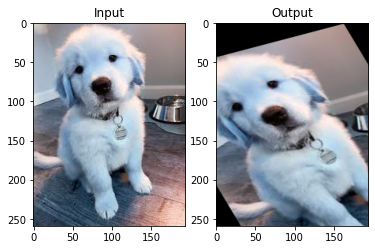

In [5]:
#affine Transformations--used to do transformations using matrix operations
img=cv2.imread('puppy.jpg')
rows, cols, channels=img.shape
pts1=np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])

pts2=np.float32([[10, 100], 
                   [200, 50],
                   [100, 250]])

warp_matrix=cv2.getAffineTransform(pts1, pts2)
#transform the input as per warp matrix to desired output
dst=cv2.warpAffine(img, warp_matrix, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
plt.show()

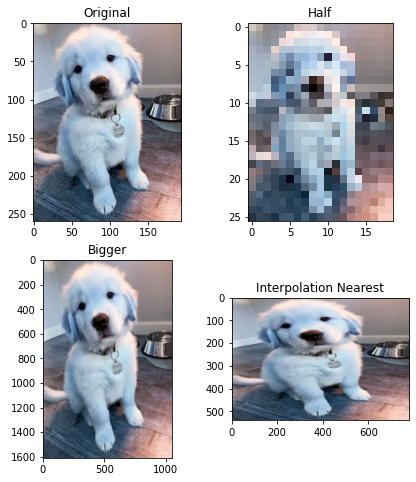

In [6]:
#% matplotlib qt--This is a magic command to display in an external window
image=cv2.imread("puppy.jpg", 1)
#loading the image
half=cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger=cv2.resize(image, (1050, 1610))
stretch_near=cv2.resize(image, (780, 540), interpolation=cv2.INTER_NEAREST)

Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

plt.figure(figsize=(7,8))
for i in range(count):
  plt.subplot(2, 2, i+1)
  plt.title(Titles[i])
  plt.imshow(images[i])
plt.show()

In [7]:
#resizing image to lower dimensions
file_name='puppy.jpg'
try:
  #read the image from the disk.
  image=cv2.imread(file_name) 
  #get number of pixel horizontally and vertically
  (height, width)=image.shape[:2] 
  # Specify the size of image along with interploation methods. 
  # cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC is used for zooming. 
  res=cv2.resize(image, (int(width / 2), int(height / 2)), interpolation = cv2.INTER_CUBIC) 
  # Write image back to disk. 
  cv2.imwrite('result.jpg', res) 

except IOError: 
  print ('Error while reading files !!!')  

In [8]:
#rotating image 90 degrees
try: 
  #read the image from the disk.
  image=cv2.imread(file_name) 
  #shape of image in terms of pixels
  (rows, cols)=image.shape[:2] 
  # getRotationMatrix2D creates a matrix needed for transformation. 
  # We want matrix for rotation w.r.t center to 45 degree without scaling. 
  rot_mat=cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1) 
  res = cv2.warpAffine(image, rot_mat, (cols, rows)) 
  #write image back to disk. 
  cv2.imwrite('result1.jpg', res) 
except IOError:
  print ('Error while reading files !!!')  

In [9]:
img=cv2.imread(file_name) 
(rows, cols)=img.shape[:2] 
mat=np.float32([[1,0,100],[0,1,50]])
res=cv2.warpAffine(img, mat, (cols, rows)) 
cv2.imwrite('result2.jpg', res) #Translating image...shifting 100 in row and 50 in column

True

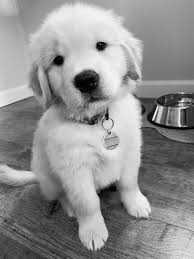

In [10]:
#reading an image in default mode 
src=cv2.imread('puppy.jpg') 
 
# Using cv2.cvtColor() method 
# Using cv2.COLOR_BGR2GRAY color space 

image=cv2.cvtColor(src, cv2.COLOR_BGR2GRAY ) 
  
#displaying the greyscale image  
cv2_imshow(image)

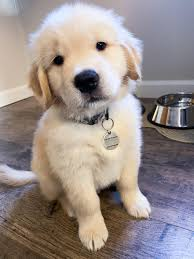

In [11]:
img=cv2.imread('puppy.jpg')
type(img)
cv2_imshow(img)

###Slicing out color channels(Red, Green, Blue)

In [12]:
pic_array=np.asarray(img)

In [13]:
pic_blue=pic_array.copy()

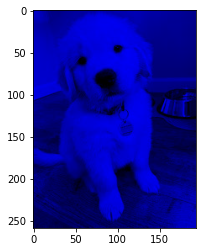

In [14]:
pic_blue[:,:,0]=0
pic_blue[:,:,1]=0
plt.imshow(pic_blue)

In [15]:
pic_red=pic_array.copy()

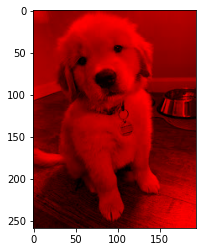

In [16]:
pic_red[:,:,1]=0
pic_red[:,:,2]=0
plt.imshow(pic_red)

In [17]:
pic_green=pic_array.copy()

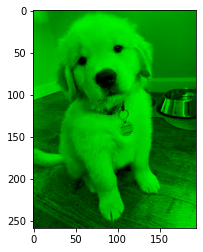

In [18]:
pic_green[:,:,0]=0
pic_green[:,:,2]=0
plt.imshow(pic_green)

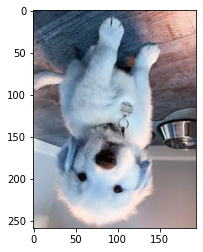

In [19]:
#flipping the image vertically down
new_img=cv2.flip(img,0)
plt.imshow(new_img)

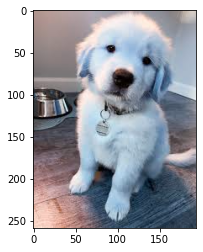

In [20]:
#flipping the image in mirror view
new_img = cv2.flip(img,1)
plt.imshow(new_img)

In [21]:
image=face_recognition.load_image_file('Denis_Mukwege.jpg')

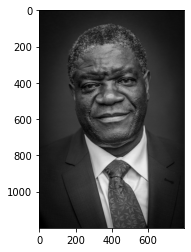

In [22]:
plt.imshow(image)
plt.show()

In [23]:
face_locations=face_recognition.face_locations(image,model='cnn')

In [24]:
face_locations

[(279, 546, 632, 194)]

In [25]:
for face_location in face_locations:
  top,right,bottom,left =face_location
  img=cv2.rectangle(image,(left,top),(right,bottom),(0,0,256),2) 

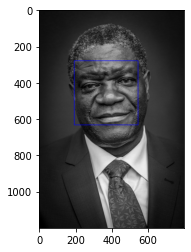

In [26]:
plt.imshow(img)
plt.show()

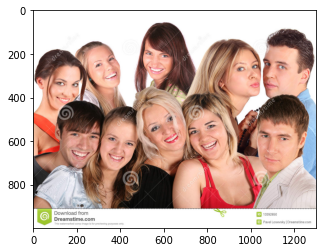

In [27]:
image1=face_recognition.load_image_file('many.jpg')
plt.imshow(image1)
plt.show()

In [28]:
face_locations=face_recognition.face_locations(image1,model='cnn')

In [29]:
for face_location in face_locations:
  top,right,bottom,left =face_location
  img=cv2.rectangle(image1,(left,top),(right,bottom),(256,0,0),3)

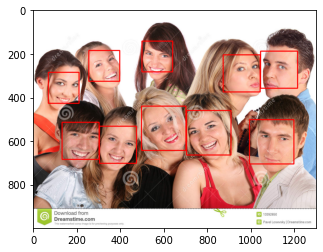

In [30]:
plt.imshow(img)
plt.show()

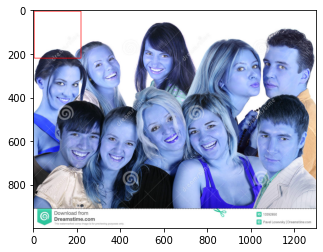

In [31]:
#reading an image in default mode
image = cv2.imread('many.jpg')
# Window name in which image is displayed
window_name = 'Image'
# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (5, 5)
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (220, 220)
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
img1 = cv2.rectangle(image, start_point, end_point, color, thickness)
# Displaying the image
plt.imshow(image)
plt.show()

In [32]:
# Reading an image in grayscale mode
image = cv2.imread('many.jpg')
# Window name in which image is displayed
window_name = 'Image'
# Start coordinate, here (100, 50)
# represents the top left corner of rectangle
start_point = (100, 50)
# Ending coordinate, here (125, 80)
# represents the bottom right corner of rectangle
end_point = (125, 80)
# Black color in BGR
color = (0, 0, 0)
# Line thickness of -1 px
# Thickness of -1 will fill the entire shape
thickness = -1
# Using cv2.rectangle() method
# Draw a rectangle of black color of thickness -1 px
img2 = cv2.rectangle(image, start_point, end_point, color, thickness)

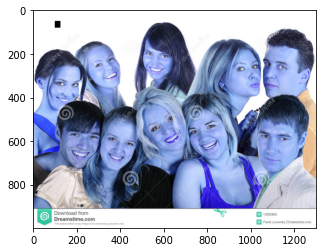

In [33]:
plt.imshow(img2)
plt.show()

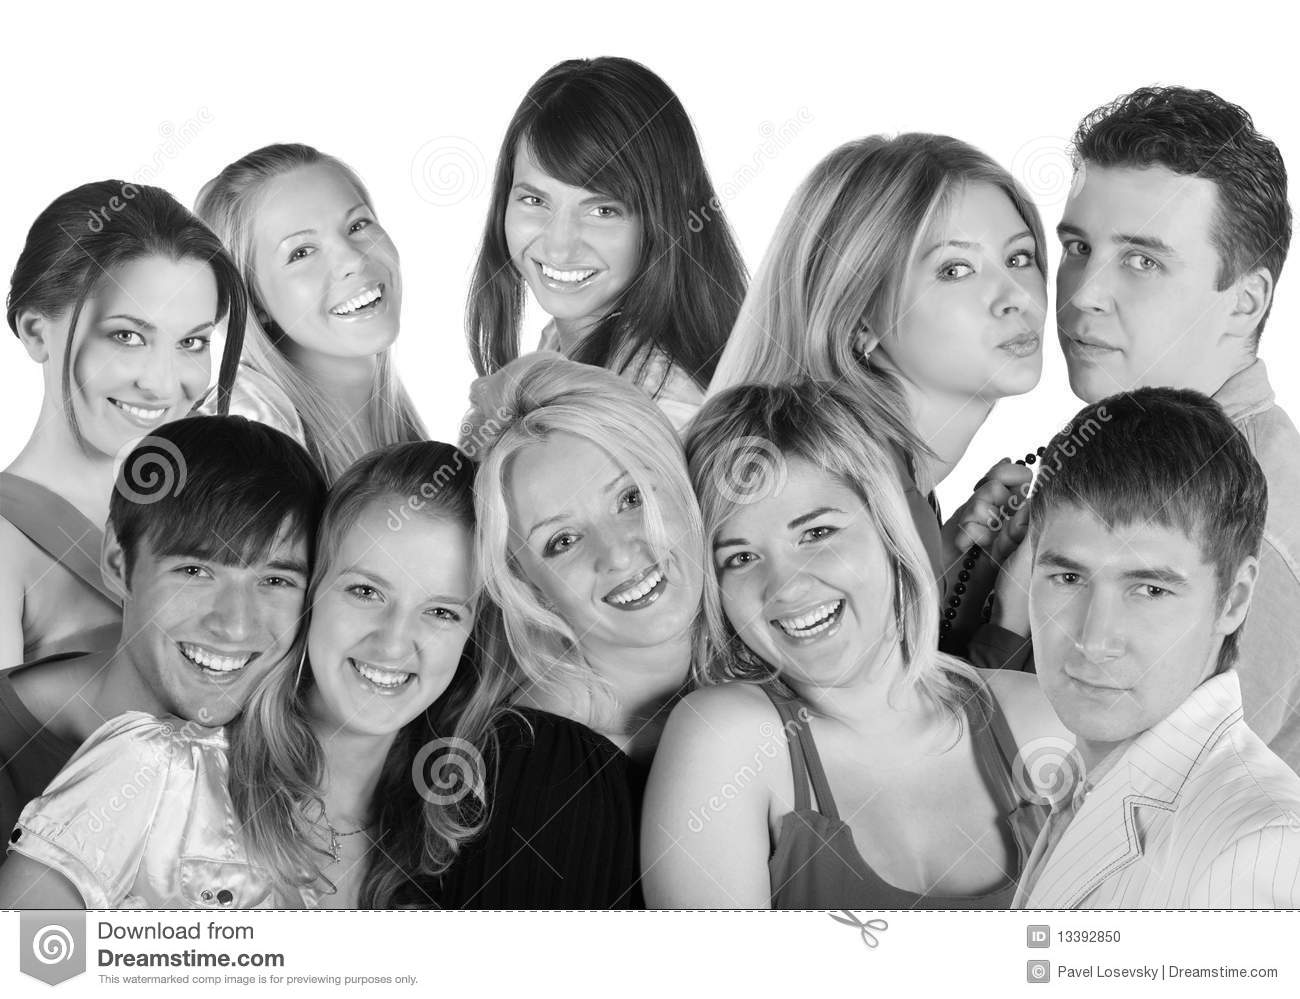

In [34]:
# You can give path to the 
# image as first argument 
img = cv2.imread('many.jpg', 0) 
  
# will show the image in a window 
cv2_imshow(img) 
k = cv2.waitKey(0) & 0xFF
  
# wait for ESC key to exit 
if k == 27:
  cv2.destroyAllWindows() 
     
# wait for 's' key to save and exit 
elif k == ord('s'):
  cv2.imwrite('messigray.png',img) 
  cv2.destroyAllWindows()

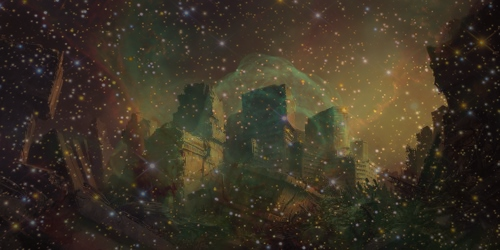

In [35]:
image1=cv2.imread('image1.jpg') 
image2=cv2.imread('image2.jpg')
# cv2.addWeighted is applied over the # image inputs with applied parameters 
weightedSum=cv2.addWeighted(image1, 0.5, image2, 0.4, 0)
 
# the window showing output image # with the weighted sum  
cv2_imshow(weightedSum)#'Weighted Image', weightedSum)
 
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:
  cv2.destroyAllWindows()

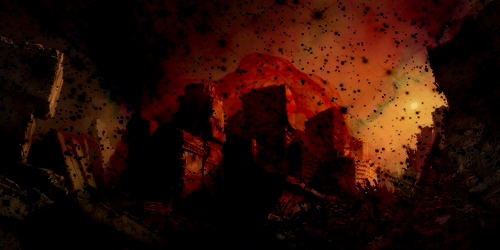

In [36]:
# cv2.subtract is applied over the # image inputs with applied parameters
sub = cv2.subtract(image1, image2)
 
# the window showing output image # with the subtracted image 
cv2_imshow(sub)#('Subtracted Image', sub)
 
# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27:
      cv2.destroyAllWindows()

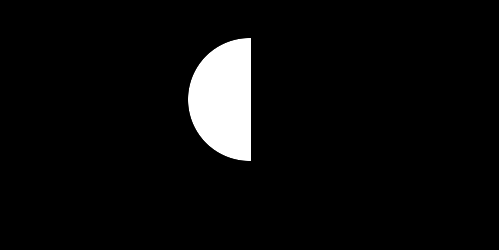

In [37]:
# path to input images are specified and   # images are loaded with imread command  
image1 = cv2.imread('bitand1.png')  
image2 = cv2.imread('bitand2.png') 
  
# cv2.bitwise_and is applied over the # image inputs with applied parameters  
dest_and=cv2.bitwise_and(image1, image2, mask = None) 
  
# the window showing output image # with the Bitwise AND operation # on the input images 
cv2_imshow(dest_and) 
   
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:
  cv2.destroyAllWindows() 

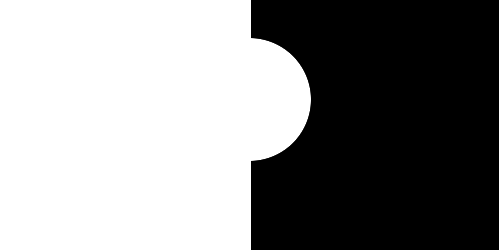

In [38]:
# path to input images are specified and   # images are loaded with imread command  
image1 = cv2.imread('bitand1.png')  
image2 = cv2.imread('bitand2.png') 
  
# cv2.bitwise_and is applied over the # image inputs with applied parameters  
dest_and=cv2.bitwise_or(image1, image2, mask = None) 
  
# the window showing output image # with the Bitwise AND operation # on the input images 
cv2_imshow(dest_and) 
   
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:
  cv2.destroyAllWindows() 

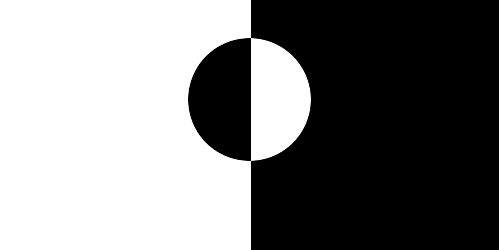

In [39]:
# path to input images are specified and   # images are loaded with imread command  
image1 = cv2.imread('bitand1.png')  
image2 = cv2.imread('bitand2.png') 
  
# cv2.bitwise_and is applied over the # image inputs with applied parameters  
dest_and=cv2.bitwise_xor(image1, image2, mask = None) 
  
# the window showing output image # with the Bitwise AND operation # on the input images 
cv2_imshow(dest_and) 
   
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:
  cv2.destroyAllWindows() 

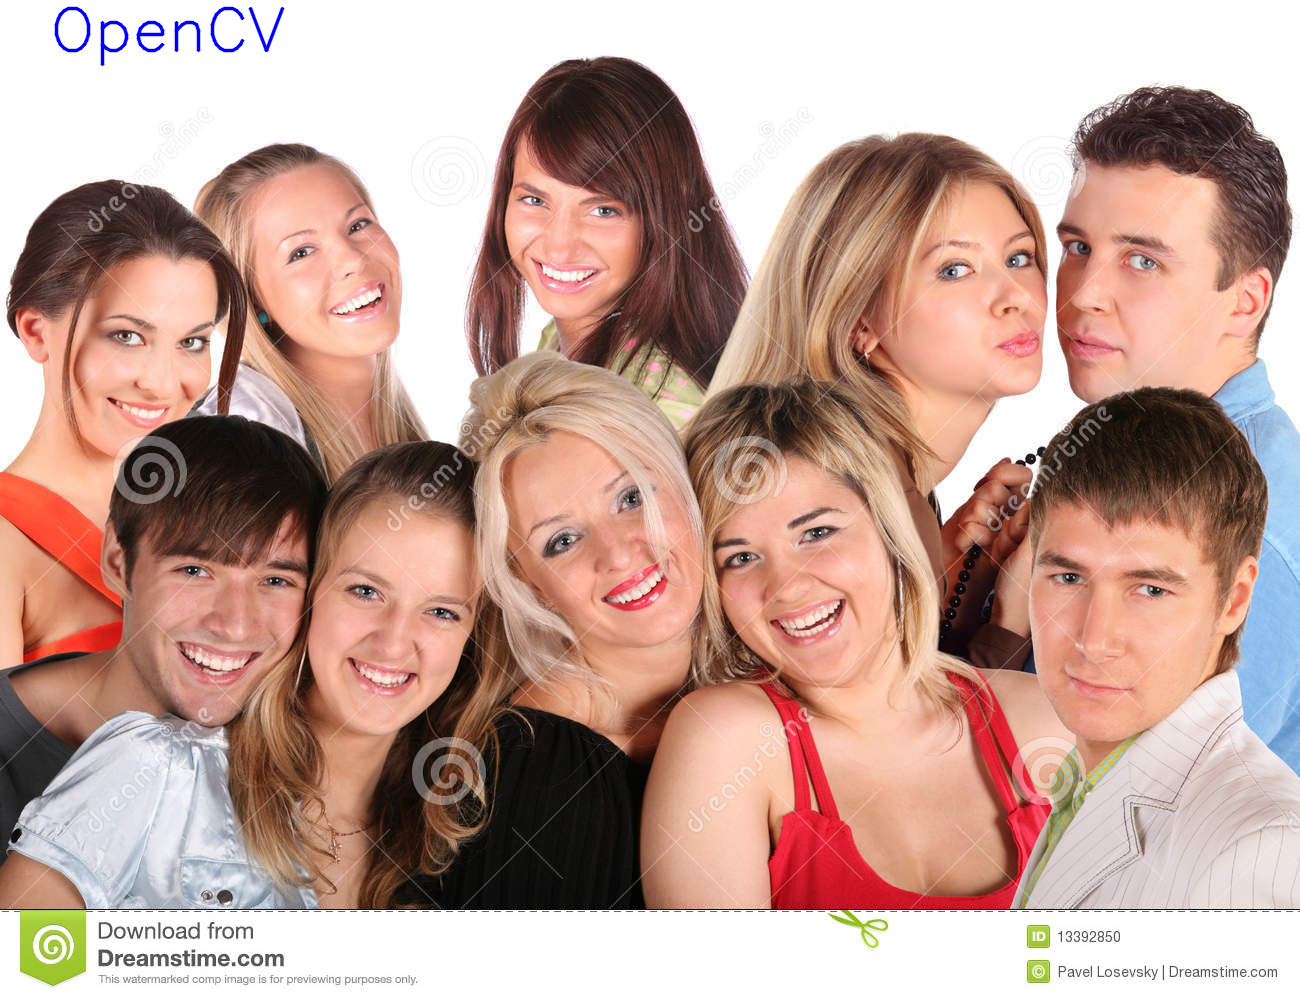

In [40]:
image = cv2.imread('many.jpg')
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# org
org = (50, 50)
# fontScale
fontScale = 2
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.putText() method
image = cv2.putText(image, 'OpenCV', org, font, fontScale, color, thickness, cv2.LINE_AA)
# Displaying the image
cv2_imshow(image)

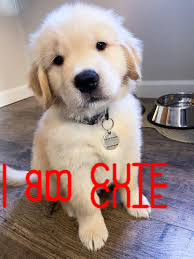

In [41]:
image = cv2.imread('puppy.jpg')
# Window name in which image is displayed
window_name = 'Image'
# text
text = 'I am CUTE'
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# org
org = (00, 185)
# fontScale
fontScale = 1
# Red color in BGR
color = (0, 0, 255)
# Line thickness of 2 px
thickness = 2
# Using cv2.putText() method
image = cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA, False)
# Using cv2.putText() method
image = cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA, True)
# Displaying the image
cv2_imshow(image)

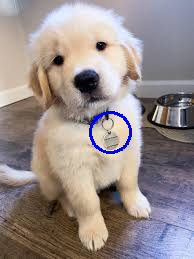

In [42]:
# Reading an image in default mode
image = cv2.imread('puppy.jpg')
# Window name in which image is displayed
window_name = 'Image'
# Center coordinates
center_coordinates = (110, 132)
# Radius of circle
radius = 20
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv2.circle(image, center_coordinates, radius, color, thickness)
# Displaying the image
cv2_imshow(image)

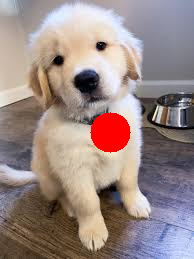

In [43]:
image = cv2.imread('puppy.jpg')
# Window name in which image is displayed
window_name = 'Image'
# Center coordinates
center_coordinates = (110, 132)
# Radius of circle
radius = 20
# Red color in BGR
color = (0, 0, 255)
# Line thickness of -1 px
thickness = -1
# Using cv2.circle() method
# Draw a circle of red color of thickness -1 px
image = cv2.circle(image, center_coordinates, radius, color, thickness)
# Displaying the image
cv2_imshow(image)

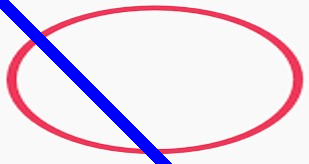

In [44]:
image = cv2.imread('circle1.jpg')
# Window name in which image is displayed
window_name = 'Image'
# Start coordinate, here (0, 0)
# represents the top left corner of image
start_point = (0, 0)
# End coordinate, here (250, 250)
# represents the bottom right corner of image
end_point = (250, 250)
# Green color in BGR
color = (255, 0, 0)
# Line thickness of 9 px
thickness = 9
# Using cv2.line() method
# Draw a diagonal green line with thickness of 9 px
image = cv2.line(image, start_point, end_point, color, thickness,)
# Displaying the image
cv2_imshow(image)

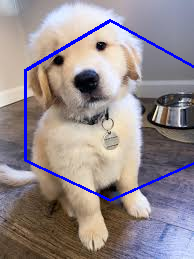

In [45]:
image=cv2.imread('puppy.jpg')
# Window name in which image is
# displayed
window_name='Image'
# Polygon corner points coordinates
pts = np.array([[25, 70], [25, 160], [110, 200], [200, 160], [200, 70], [110, 20]], np.int32)
pts = pts.reshape((-1, 1, 2))
isClosed = True

# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.polylines() method
# Draw a Blue polygon with
# thickness of 1 px
image=cv2.polylines(image, [pts], isClosed, color, thickness)
# Displaying the image
cv2_imshow(image)

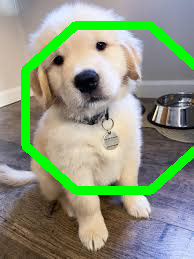

In [46]:
image=cv2.imread('puppy.jpg')
# Window name in which image is
# displayed
window_name='Image'
# Polygon corner points coordinates
pts = np.array([[25, 70], [25, 145], [75, 190], [150, 190], [200, 145], [200, 70], [150, 25], [75, 25]], np.int32)
pts = pts.reshape((-1, 1, 2))
isClosed = True
# Green color in BGR
color = (0, 255, 0)
# Line thickness of 8 px
thickness = 8
# Using cv2.polylines() method
# Draw a Green polygon with
# thickness of 1 px
image=cv2.polylines(image, [pts], isClosed, color, thickness)
# Displaying the image
cv2_imshow(image)

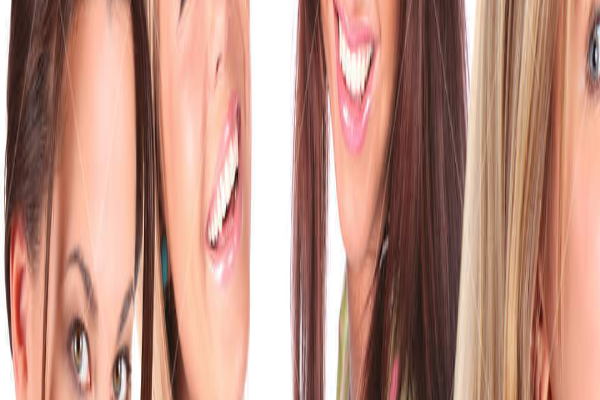

In [47]:
image=cv2.imread('many.jpg') 

# Locate points of the documents or object which you want to transform 
pts1=np.float32([[0, 260], [640, 260], [0, 400], [640, 400]]) 
pts2=np.float32([[0, 0], [400, 0], [0, 640], [400, 640]]) 

# Apply Perspective Transform Algorithm 
matrix=cv2.getPerspectiveTransform(pts1, pts2) 
result=cv2.warpPerspective(image, matrix, (600, 400)) #retaining some part of an image

# Wrap the transformed image 
cv2_imshow(result) # Transformed Capture 